In [1]:
#!pip install sklearn

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
df = pd.read_csv('invest_prep_сat_boost.csv', sep=';')
df.head(20)

,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,can_calc_percents,employment_type_last_year,...,borrowed_for_daily_expenses_last_year,can_call,can_text,can_use_internet,can_make_transaction,phone_ownership,has_investment,num_financial_activities_last_year,literacy,formal_savings (Y)
0,0,False,57,True,True,1,0,3.0,True,0,...,False,True,True,True,True,2,False,0,True,False
1,1,False,40,False,True,2,1,0.0,False,0,...,False,False,False,False,False,2,False,0,True,True
2,2,False,35,True,True,0,2,1.0,False,1,...,True,True,True,False,False,2,False,2,False,False
3,2,True,19,True,False,0,3,3.0,False,0,...,False,True,False,False,False,1,False,0,True,False
4,3,False,61,True,True,0,0,0.0,False,1,...,True,False,False,False,False,1,False,0,False,False
5,3,True,16,True,False,0,3,2.0,False,1,...,True,True,True,True,True,1,False,0,True,False
6,0,False,40,False,True,0,1,0.0,False,2,...,False,False,False,False,False,0,True,0,False,False
7,1,False,27,True,True,2,2,0.0,False,1,...,False,False,False,False,False,0,False,1,False,True
8,3,True,35,False,True,0,1,3.0,True,0,...,False,True,True,True,True,2,True,2,True,True
9,4,False,72,True,False,1,1,1.0,False,2,...,False,False,False,False,False,2,False,4,False,True


In [4]:
df.shape

(8400, 28)

In [5]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, 1:]
y = df['country']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [6]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg_cat_boost.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [7]:

# Importing prepared dataset
import pickle
input = open('data_reg_cat_boost.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [8]:
# Metrics
def metrics(X_train, X_test, y_train, y_test, y_pred, model):
    RMSE = [mean_squared_error(y_train, model.predict(X_train),squared=False), mean_squared_error(y_test, y_pred, squared=False)]
    R2 = [model.score(X_train, y_train), model.score(X_test, y_test)]
    results = {'RMSE': RMSE, 'R2':R2}
    return pd.DataFrame(results, index=['Train', 'Test'])

In [13]:
f = ['is_urban','female','married','can_calc_percents','income_government_last_year','income_own_business_last_year','advanced_phone_use','active_bank_user','cash_property_savings','has_insurance','borrowed_for_emergency_last_year','borrowed_for_daily_expenses_last_year','can_call','can_text','can_use_internet','can_make_transaction','has_investment','literacy','formal_savings (Y)']

In [14]:
#!pip install catboost

In [15]:
from sklearn.metrics import mean_squared_error

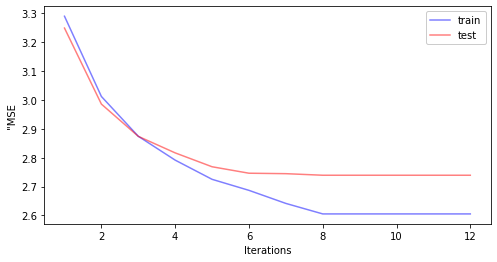

In [16]:

def catboost_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostRegressor(iterations=i,random_state=10,eval_metric='RMSE',loss_function='RMSE').fit(X_train, y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel('"MSE')
    ax.set_xlabel('Iterations')
    ax.legend(framealpha=1, frameon=True);
    
from catboost import CatBoostRegressor
catboost_best_n_estimator(X_train[f], X_test[f], y_train, y_test, list(range(1,13)))

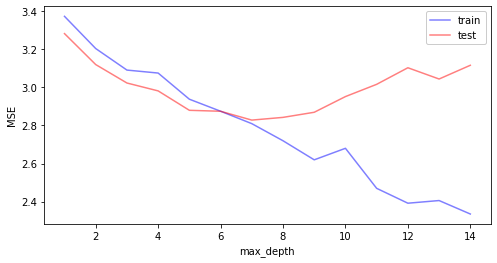

In [17]:

def catboost_max_depth(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostRegressor(iterations=3,max_depth=i,random_state=10,eval_metric='RMSE',loss_function='RMSE').fit(X_train,y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_depth")
    ax.legend(framealpha=1, frameon=True);

catboost_max_depth(X_train[f], X_test[f], y_train, y_test, list(range(1,15)))

In [18]:
# Fitting CatBoost to the Training set
cb = CatBoostRegressor(iterations=7,max_depth=9,random_state=10,eval_metric='RMSE',loss_function='RMSE').fit(X_train[f], y_train,eval_set=(X_test[f], y_test),logging_level='Silent')

# Predicting the Test set results
cb_y_pred = cb.predict(X_test[f])

# Metrics
metrics(X_train[f], X_test[f], y_train, y_test, cb_y_pred, cb).round(2)

,RMSE,R2
Train,1.50,0.44
Test,1.67,0.30


*Эксперимент построения модели на исходных качественных переменных продемонстрировал показатели хуже, чем в аналогичной модели.Таким образом, для большего качества необходимо большее число переменных.